# Customizing Plot Legends

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("classic")

The simplest legend can be created with the `plt.legend()` command, which automatically creates a legend for any labeled plot elements:

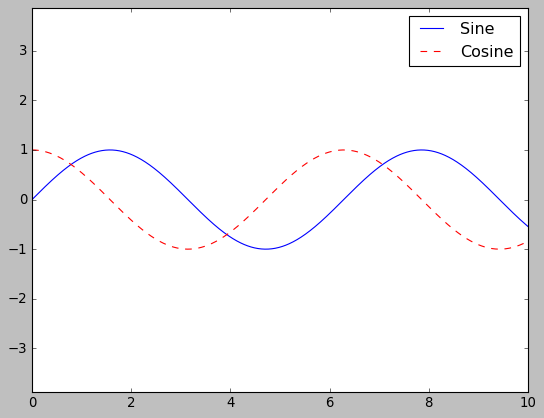

In [2]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

We can specify the location and turn off the frame

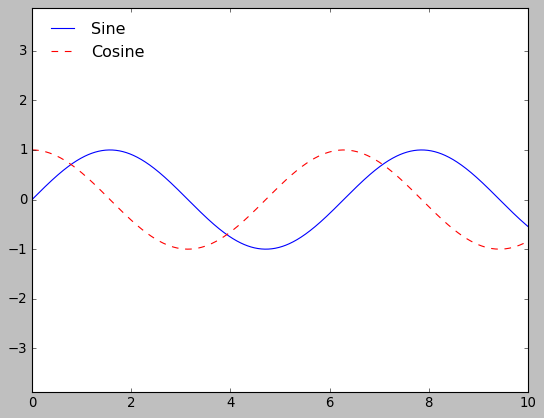

In [3]:
ax.legend(loc='upper left', frameon=False)
fig

We can use the `ncol` command to specify the number of columns in the legend

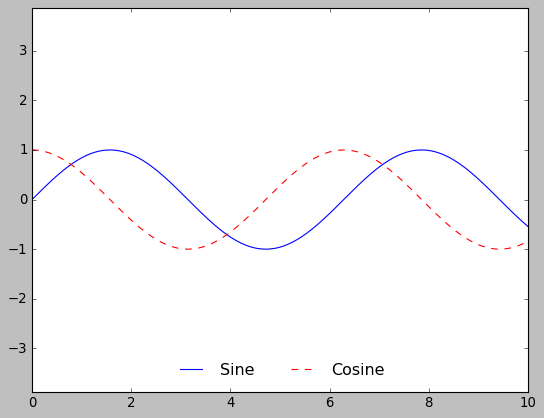

In [4]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

We can add shadows or rounded box (`fancybox`), change the transparency, the padding...


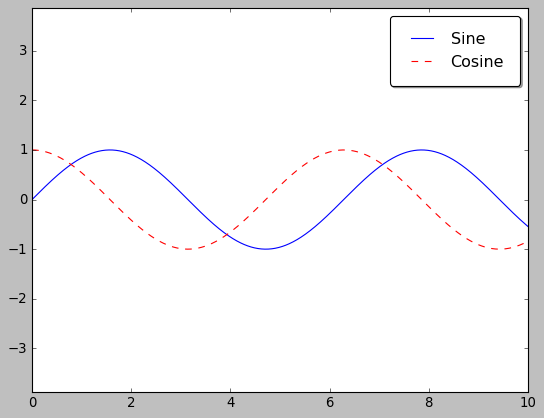

In [5]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

## Choosing Elements for the Legend

By default, all the elements are included in the legend. `plt.plot()` command is able create multiple lines, and returns a list of all created lines. Passing any of these to plt.legend() will tell it which to identify, along with the labels we'd like to specify 

[[ 0.00000000e+00  1.00000000e+00  1.22464680e-16 -1.00000000e+00]
 [ 1.00098428e-02  9.99949900e-01 -1.00098428e-02 -9.99949900e-01]
 [ 2.00186827e-02  9.99799606e-01 -2.00186827e-02 -9.99799606e-01]
 ...
 [-5.27114986e-01 -8.49793970e-01  5.27114986e-01  8.49793970e-01]
 [-5.35594881e-01 -8.44475058e-01  5.35594881e-01  8.44475058e-01]
 [-5.44021111e-01 -8.39071529e-01  5.44021111e-01  8.39071529e-01]]


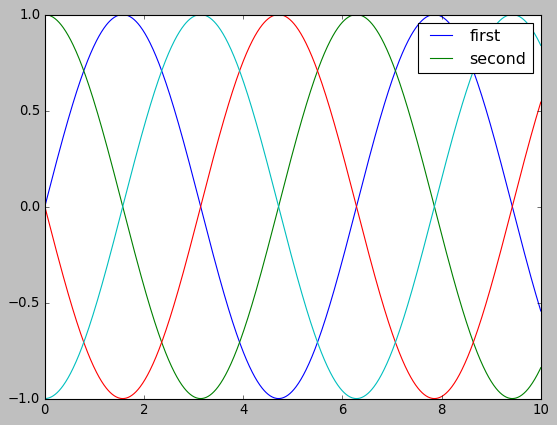

In [7]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

However, it may be clearer to apply the labels when ploting each element

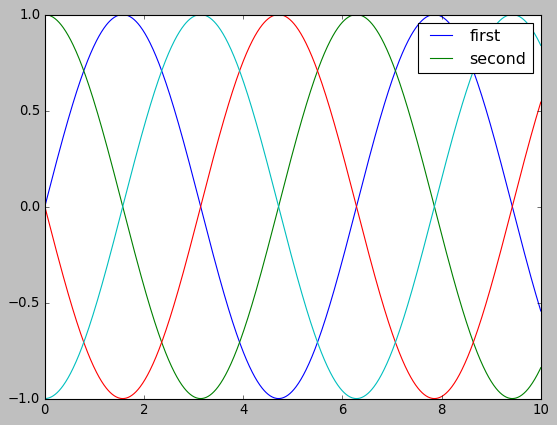

In [8]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

## Legend for Size of Points

Sometimes, we use the size of points to mark certain features, and we want to create a legend reflecting this.

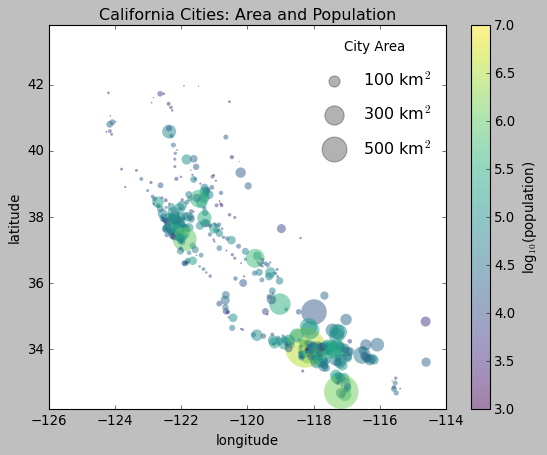

In [12]:
import pandas as pd
cities = pd.read_csv('california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis('equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

We are forced to plot (scatter) empty lists, because legends can only reference objects in the figure. So we have to fake them. 

## Multiple Legends

Adding a second legend will override the first one. To add a second one, we need to use `ax.add_artist()`

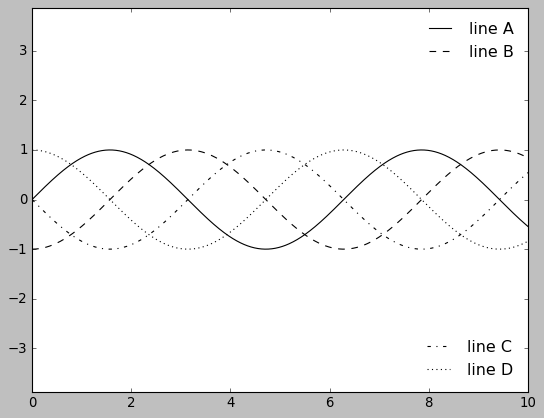

In [13]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);